# Домашнее задание №4

In [1]:
import numpy as np
from hashlib import sha256

def check(image, ref_hash):
    image_hash = sha256(np.ascontiguousarray(image)).hexdigest()
    if image_hash == ref_hash:
        print("All good \U0001F44D")
    else:
        raise RuntimeError("Image hash differ: " + image_hash)

## Задание 1

Преобразовать исходное изображение в градации серого

In [2]:
import cv2
import skimage
import skimage.io
from matplotlib import pyplot as plt

src_image_url = 'https://drive.google.com/u/0/uc?id=1Sog--5y5oB_k1J3H1AEvJ6yaQ2w6xt9g&export=download'
src_image = skimage.io.imread(src_image_url)

In [3]:
# Write your code here
gray_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)

In [4]:
check(gray_image, "576390f5e44924b5f79e402b059e80b02bd6284056a95f5e850bebc14b47cbb7")

All good 👍


## Задание 2

Смоделировать смаз для полутонового изображения

In [5]:
import numpy as np

gray_image_fft = np.fft.fft2(gray_image)

# Write your code here
a = 10
b = 20

img_rows, img_cols = gray_image_fft.shape
u, v = np.fft.fftfreq(img_cols)[np.newaxis], np.fft.fftfreq(img_rows)[np.newaxis].T
hmm = np.pi * (u * a + v * b)
smooth_operator = np.sin(hmm) * np.exp(-1j * hmm)
smooth_operator = np.divide(smooth_operator, hmm, where=hmm!=0) 
smooth_operator[hmm==0] = 1
#smooth_operator = np.fft.fftshift(smooth_operator)

smooth_image_fft = gray_image_fft * smooth_operator
smooth_image = np.abs(np.fft.ifft2(smooth_image_fft))
smooth_image /= (np.iinfo(np.uint8).max)

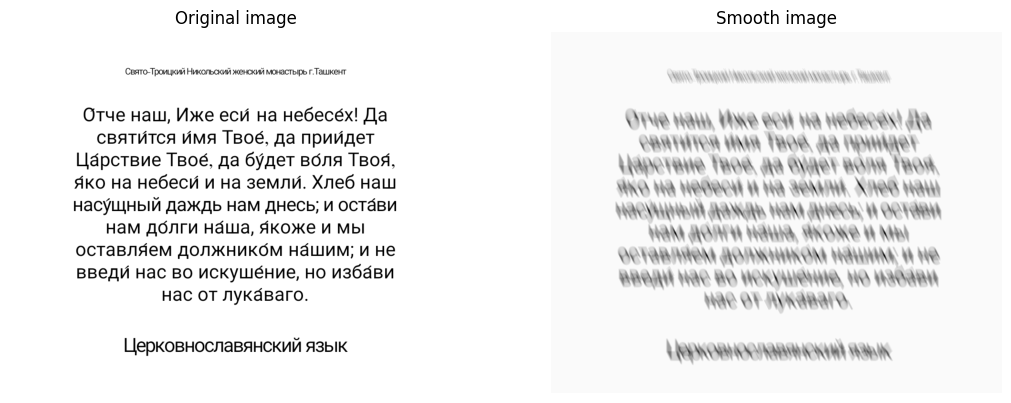

In [6]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(smooth_image, cmap='gray')
plt.axis("off")
plt.title("Smooth image");

## Задание 3

Добавить на смазанное изображение гауссов шум

In [7]:
import skimage.util

# Write your code here
noised_smooth_image = skimage.util.random_noise(smooth_image)

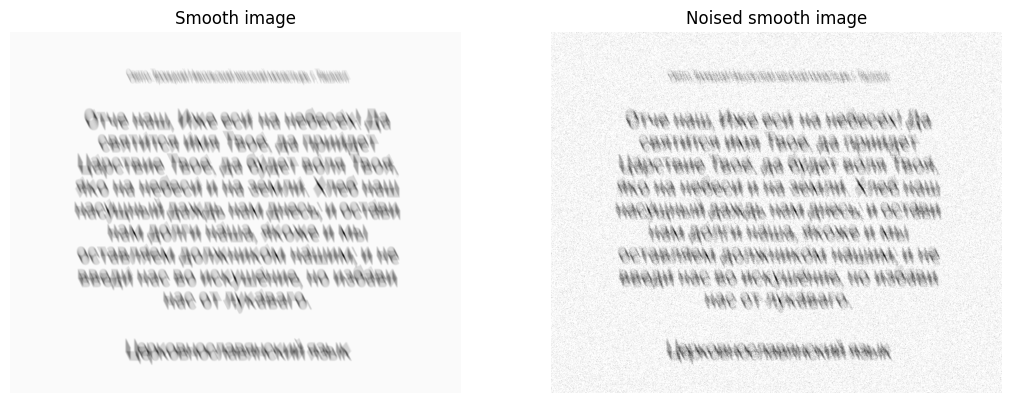

In [8]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(smooth_image, cmap='gray')
plt.axis("off")
plt.title("Smooth image")

plt.subplot(1, 2, 2)
plt.imshow(noised_smooth_image, cmap='gray')
plt.axis("off")
plt.title("Noised smooth image");

## Задание 4

Выполнить реконструкцию изображения методом инверсной фильтрации

In [9]:
# Write your code here
def inverse_deconv(img, operator, a=0.005):
    H = np.copy(operator)
    H[np.abs(H) < a] = a
    G = np.fft.fft2(img)
    F = G / H
    F /= abs(F.max())
    return abs(np.fft.ifft2(F)) 
    
inv_deconv_img = inverse_deconv(smooth_image, smooth_operator)
inv_deconv_noised_img = inverse_deconv(noised_smooth_image, smooth_operator)

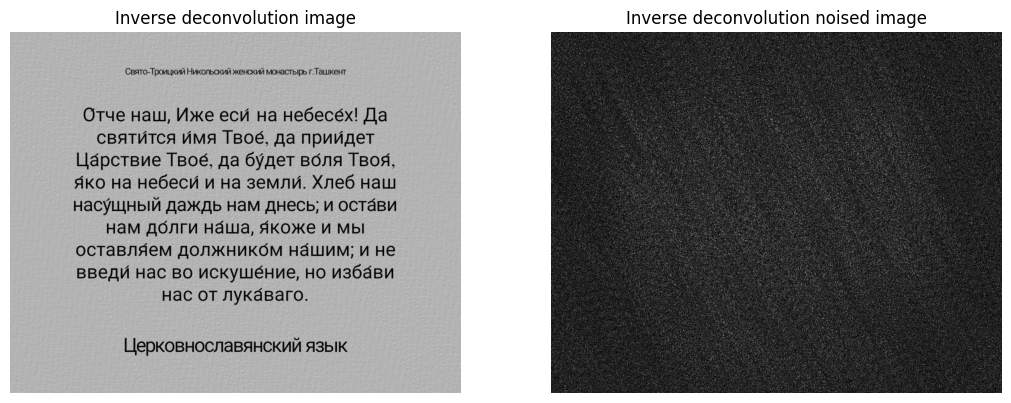

In [10]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(inv_deconv_img, cmap='gray')
plt.axis("off")
plt.title("Inverse deconvolution image")

plt.subplot(1, 2, 2)
plt.imshow(inv_deconv_noised_img, cmap='gray')
plt.axis("off")
plt.title("Inverse deconvolution noised image");

## Задание 5

Смоделировать искажение размытием для полутонового изображения

In [11]:
psf = np.ones((9, 9)) / (9 * 9)

# Write your code here
k = 250

img_rows, img_cols = gray_image_fft.shape
u, v = np.fft.fftfreq(img_cols)[np.newaxis], np.fft.fftfreq(img_rows)[np.newaxis].T
smooth_operator = np.exp(-k * (u ** 2 + v ** 2))

smooth_image_fft = gray_image_fft * smooth_operator
smooth_image = np.abs(np.fft.ifft2(smooth_image_fft))
smooth_image /= (np.iinfo(np.uint8).max)

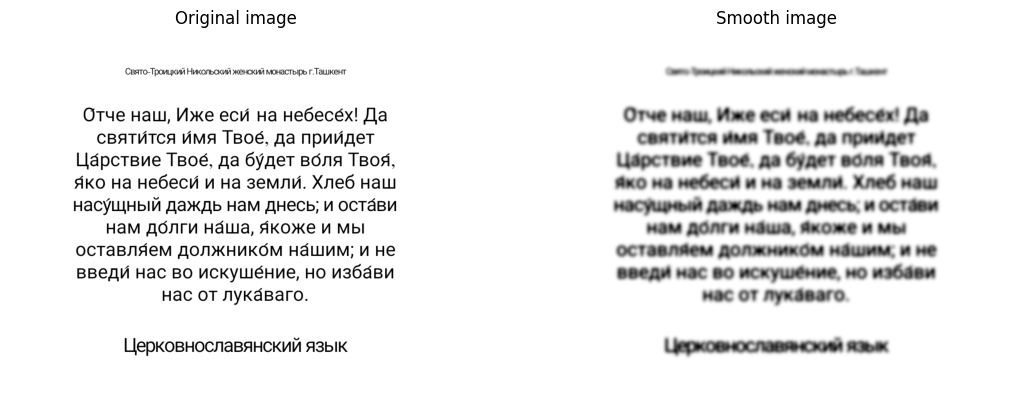

In [12]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(smooth_image, cmap='gray')
plt.axis("off")
plt.title("Smooth image");

## Задание 6

Добавить на размытое изображение гауссов шум

In [13]:
import skimage.util

# Write your code here
noised_smooth_image = skimage.util.random_noise(smooth_image)

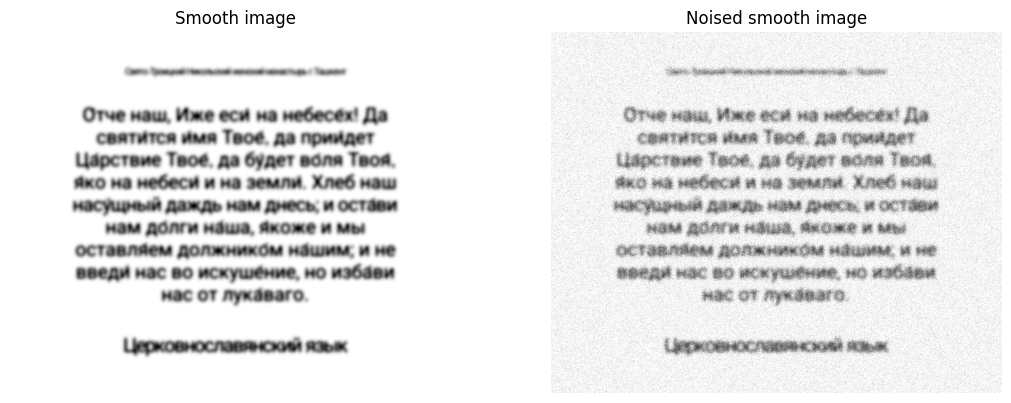

In [14]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(smooth_image, cmap='gray')
plt.axis("off")
plt.title("Smooth image")

plt.subplot(1, 2, 2)
plt.imshow(noised_smooth_image, cmap='gray')
plt.axis("off")
plt.title("Noised smooth image");

## Задание 7

Выполнить реконструкцию изображения методом Люси-Ричардсона

In [15]:
import skimage.restoration

# Write your code here
lucy_deconv_img = skimage.restoration.richardson_lucy(smooth_image, psf)
lucy_deconv_noised_img = skimage.restoration.richardson_lucy(noised_smooth_image, psf)

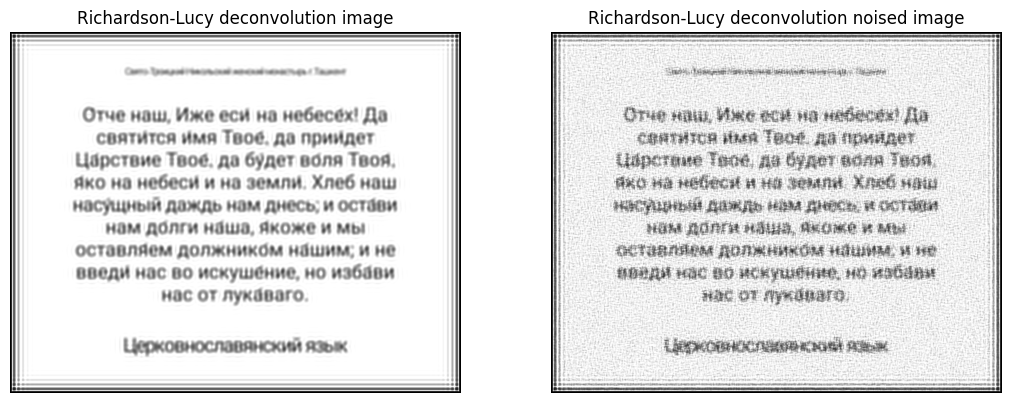

In [16]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(lucy_deconv_img, cmap='gray')
plt.axis("off")
plt.title("Richardson-Lucy deconvolution image")

plt.subplot(1, 2, 2)
plt.imshow(lucy_deconv_noised_img, cmap='gray')
plt.axis("off")
plt.title("Richardson-Lucy deconvolution noised image");

### Выполнил: Лежнин Максим Витальевич